In [1]:
# Dependencies
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import hvplot.pandas
import seaborn as sns

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a Pandas DataFrame
df = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Get the summary statistics
df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# plot the data
df.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

## Data Preparation

##### Normalize the Data with `StandardScalar()`

In [5]:
# initialize
scaler = StandardScaler()

# fit
scaler.fit(df)

# predict/transform
scaled_data = scaler.transform(df)

# Create a list to store the coin_id index values from the original DataFrame
coin_id = df.index

# Create a list to store the column names
columns = df.columns

# Create a new DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, index=coin_id, columns=columns)

# Display the first 5 rows of the data
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


## Find the best k-value with the Original Data

In [6]:
# define X
X = df_scaled

In [7]:
# Run KMeans, Silhouette Score, and Calinski-Harabasz Score
# Create a a list to store inertia values
inertia = []
silhouettes = []
cha_chas = []

# Create a a list to store the values of k
# Minimum value needs to be 2 because of the Silhouette Score
k = list(range(2, 20))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)

    # Get the Silhouette Score
    score = silhouette_score(X, preds)
    silhouettes.append(score)

    # Get the Calinski_Harabasz Score
    cha_cha = calinski_harabasz_score(X, preds)
    cha_chas.append(cha_cha)
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 19
Finished 3 out of 19
Finished 4 out of 19
Finished 5 out of 19
Finished 6 out of 19
Finished 7 out of 19
Finished 8 out of 19
Finished 9 out of 19
Finished 10 out of 19
Finished 11 out of 19
Finished 12 out of 19
Finished 13 out of 19
Finished 14 out of 19
Finished 15 out of 19
Finished 16 out of 19
Finished 17 out of 19
Finished 18 out of 19
Finished 19 out of 19


In [8]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": cha_chas}
df_elbow = pd.DataFrame(elbow_data)

df_elbow["acc"] = df_elbow.inertia.diff()

# Review the DataFrame
df_elbow.head(20)

,k,inertia,silhouette_score,cha_score,acc
0,2,195.820218,0.651576,18.159573,NaN
1,3,123.190482,0.702822,25.264783,-72.629736
2,4,79.022435,0.314482,32.459853,-44.168046
3,5,63.858668,0.329023,31.448698,-15.163768
4,6,53.057788,0.287883,30.864375,-10.800879
5,7,44.406791,0.290874,30.956861,-8.650998
6,8,37.078233,0.205692,31.776126,-7.328557
7,9,32.832187,0.258600,30.965687,-4.246046
8,10,28.165433,0.244422,31.653739,-4.666754
9,11,24.964638,0.229807,31.488784,-3.200795


Looking at the above table, a k-value of 3 is likely the best based on the Silhouette Score

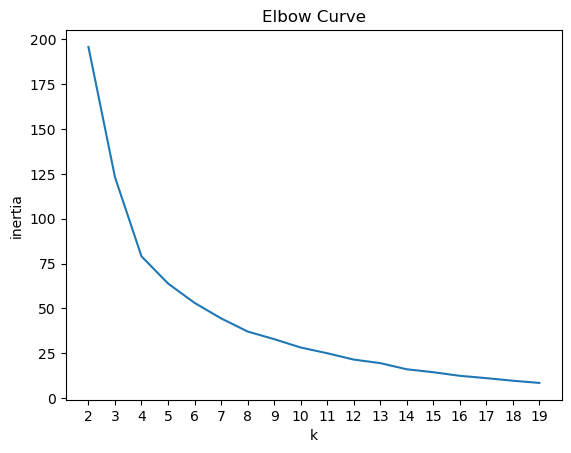

In [9]:
# Create the Elbow Curve plot
# Plot the DataFrame
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.title("Elbow Curve")
plt.xticks(df_elbow["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

##### Best k-value for the original data: Looking at the Elbow Curve, it's hard to tell between 3 and 4 for the best k-value. This is confirmed by looking at the Silhouette Score and CHA. The Silhouette Score indicates that 3 is the best k-value, but the CHA score shows that 4 is likely the best value
The elbow curve looks like `4` is the best value for k, so we will use that

## Cluster the Cryptocurrencies with K-means for the original data

In [10]:
# Copying the scaled DataFrame
df_sub = df_scaled.copy()

# Re-inititializing X
X = df_scaled

In [11]:
# Define the model with the higher value of k clusters
# Using a random_state of 1 to generate the model

# Best k-value looks to be 4, so using that
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(X)

# Make predictions
preds = model.predict(X)

# Add a column to the df_scaled with the cluster predictions
df_sub2 = df_sub.copy()
df_sub2['clusters'] = preds

df_sub2.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [ ]:
df_sub2.hvplot.scatter(
    x=""
)

## Use Principal Component Analysis to Optimize Clusters

##### Total explained variance of the 3 principal components: 

## Find the best k-value with the PCA Data

##### Best k-value for the PCA data:

##### Are the 2 k-values the same?

## Cluster the Cryptocurrencies with K-means for the PCA Data

## Compare the Results with Visualizations

##### Impact of using fewer features to cluster the data using K-Means: